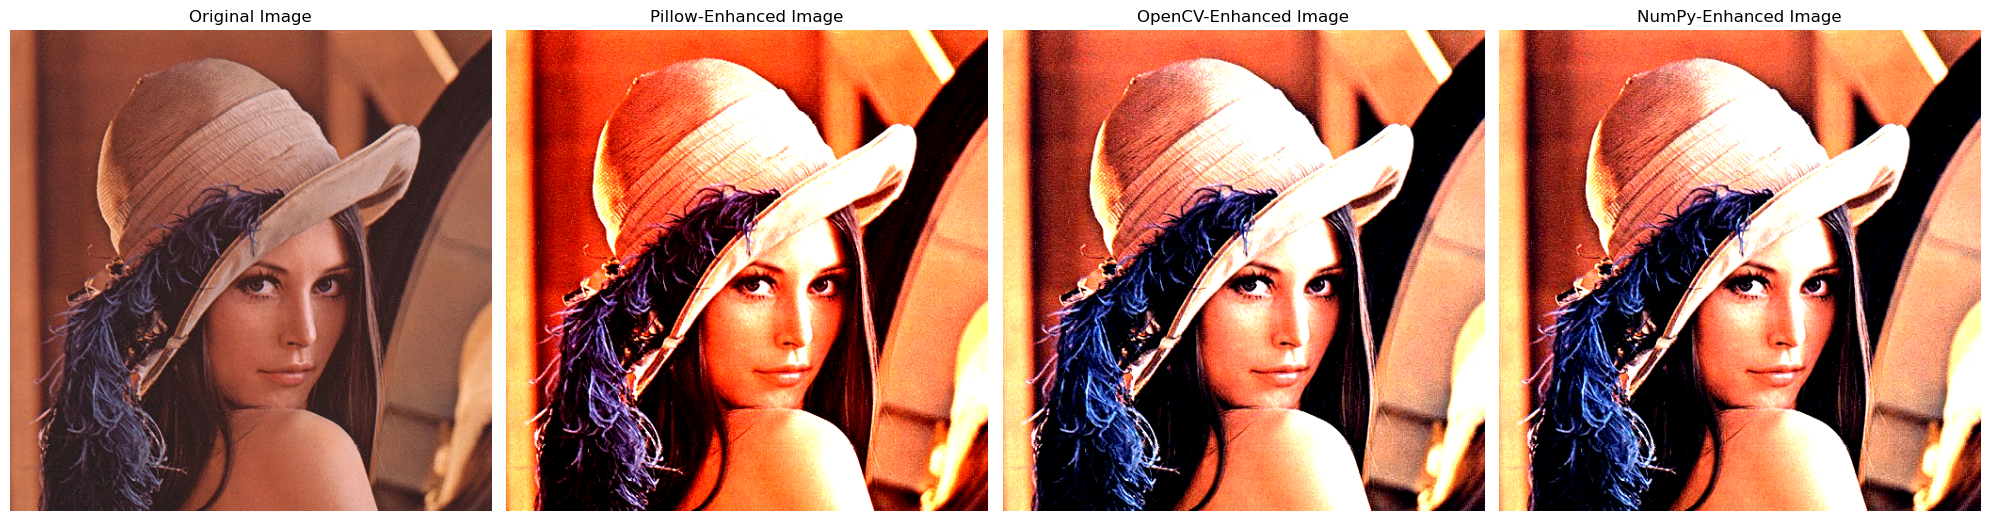

In [6]:
"""
# Program Description

This program demonstrates **color image enhancement** using the Python Imaging Library (PIL) 
and visualizes the results using Matplotlib. The program focuses on two fundamental aspects 
of color image enhancement:

1. **Brightness Adjustment**: 
   - Brightness enhancement involves uniformly scaling the intensity of all pixels in an image. 
   - It is useful for correcting underexposed or overexposed images, allowing better visibility 
     of details.

2. **Contrast Adjustment**:
   - Contrast enhancement adjusts the difference in intensity between the lightest and darkest 
     regions of an image.
   - It makes images more vivid by highlighting details in areas with subtle intensity variations.

### Key Concepts:
- **Image Enhancement**:
  - Image enhancement techniques are used to improve the visual appearance of an image or to 
    highlight specific features for further analysis.
  - Brightness and contrast are two common methods in preprocessing tasks for computer vision 
    and image processing applications.

- **PIL (Pillow)**:
  - Python Imaging Library (PIL) or its modern fork, Pillow, provides tools for image processing, 
    including enhancements like brightness, contrast, sharpness, and color adjustments.

- **Matplotlib for Visualization**:
  - Matplotlib is used here to display both the original and enhanced images side-by-side 
    for a comparative analysis.

### Practical Applications:
- Enhancing underexposed photographs.
- Preprocessing images for object detection or segmentation.
- Preparing datasets for machine learning tasks, especially in scenarios requiring image 
  quality improvement.

The program also illustrates how to integrate image processing tasks with Matplotlib for 
better understanding and debugging of processing results.
"""
"""
# Program Description

This program demonstrates **color image enhancement** using three different approaches:
1. **Pillow**: Using the `ImageEnhance` module for brightness and contrast adjustments.
2. **OpenCV**: Using pixel-wise operations for brightness and contrast enhancement.
3. **NumPy (Matrix-Based)**: Directly manipulating the pixel intensity values.

### Key Concepts:
- Brightness: Adds a constant or scales pixel values.
- Contrast: Expands the range of pixel intensities around the mean intensity.

### Practical Applications:
- Comparing enhancement results across popular libraries and custom matrix operations.
- Customizing image enhancement workflows for specific requirements.
"""

from PIL import Image, ImageEnhance
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the image path
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')  # Replace with your image path

# =========================================
# 1. Enhancement using Pillow
# =========================================
# Open the image using Pillow
image_pillow = Image.open(image_path)

# Brightness adjustment using Pillow
brightness_enhancer = ImageEnhance.Brightness(image_pillow)
bright_image_pillow = brightness_enhancer.enhance(1.5)  # Increase brightness by 50%

# Contrast adjustment using Pillow
contrast_enhancer = ImageEnhance.Contrast(bright_image_pillow)
enhanced_image_pillow = contrast_enhancer.enhance(2.0)  # Double the contrast

# =========================================
# 2. Enhancement using OpenCV
# =========================================
# Read the image using OpenCV
image_cv = cv2.imread(image_path)
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Brightness enhancement using OpenCV
bright_image_cv = np.clip(image_cv * 1.5, 0, 255).astype(np.uint8)  # Scale pixel values and clip

# Contrast enhancement using OpenCV
mean_intensity_cv = np.mean(bright_image_cv, axis=(0, 1), keepdims=True)
contrast_image_cv = np.clip((bright_image_cv - mean_intensity_cv) * 2.0 + mean_intensity_cv, 0, 255).astype(np.uint8)

# =========================================
# 3. Enhancement using NumPy (Matrix-Based)
# =========================================
# Convert the Pillow image to a NumPy array
image_np = np.array(image_pillow, dtype=np.float32)

# Brightness enhancement using NumPy
bright_image_np = np.clip(image_np * 1.5, 0, 255)  # Scale pixel values and clip

# Contrast enhancement using NumPy
mean_intensity_np = np.mean(bright_image_np, axis=(0, 1), keepdims=True)
contrast_image_np = np.clip((bright_image_np - mean_intensity_np) * 2.0 + mean_intensity_np, 0, 255).astype(np.uint8)

# Convert back to Image for display
enhanced_image_numpy = Image.fromarray(contrast_image_np)

# =========================================
# Visualization using Matplotlib
# =========================================
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Original image
axes[0].imshow(image_pillow)
axes[0].set_title("Original Image")
axes[0].axis('off')  # Hide axes

# Pillow-enhanced image
axes[1].imshow(enhanced_image_pillow)
axes[1].set_title("Pillow-Enhanced Image")
axes[1].axis('off')  # Hide axes

# OpenCV-enhanced image
axes[2].imshow(contrast_image_cv)
axes[2].set_title("OpenCV-Enhanced Image")
axes[2].axis('off')  # Hide axes

# NumPy-enhanced image
axes[3].imshow(enhanced_image_numpy)
axes[3].set_title("NumPy-Enhanced Image")
axes[3].axis('off')  # Hide axes

# Show the plots
plt.tight_layout()
plt.show()


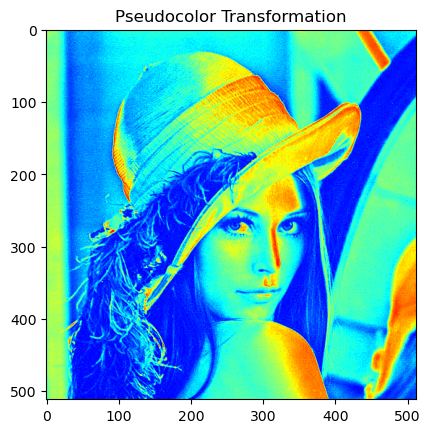

In [7]:
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply colormap
pseudocolor_image = cv2.applyColorMap(gray_image, cv2.COLORMAP_JET)

# Save the pseudocolored image
cv2.imwrite('pseudocolor_image.jpg', pseudocolor_image)

# Display the image
plt.imshow(cv2.cvtColor(pseudocolor_image, cv2.COLOR_BGR2RGB))
plt.title("Pseudocolor Transformation")
plt.show()


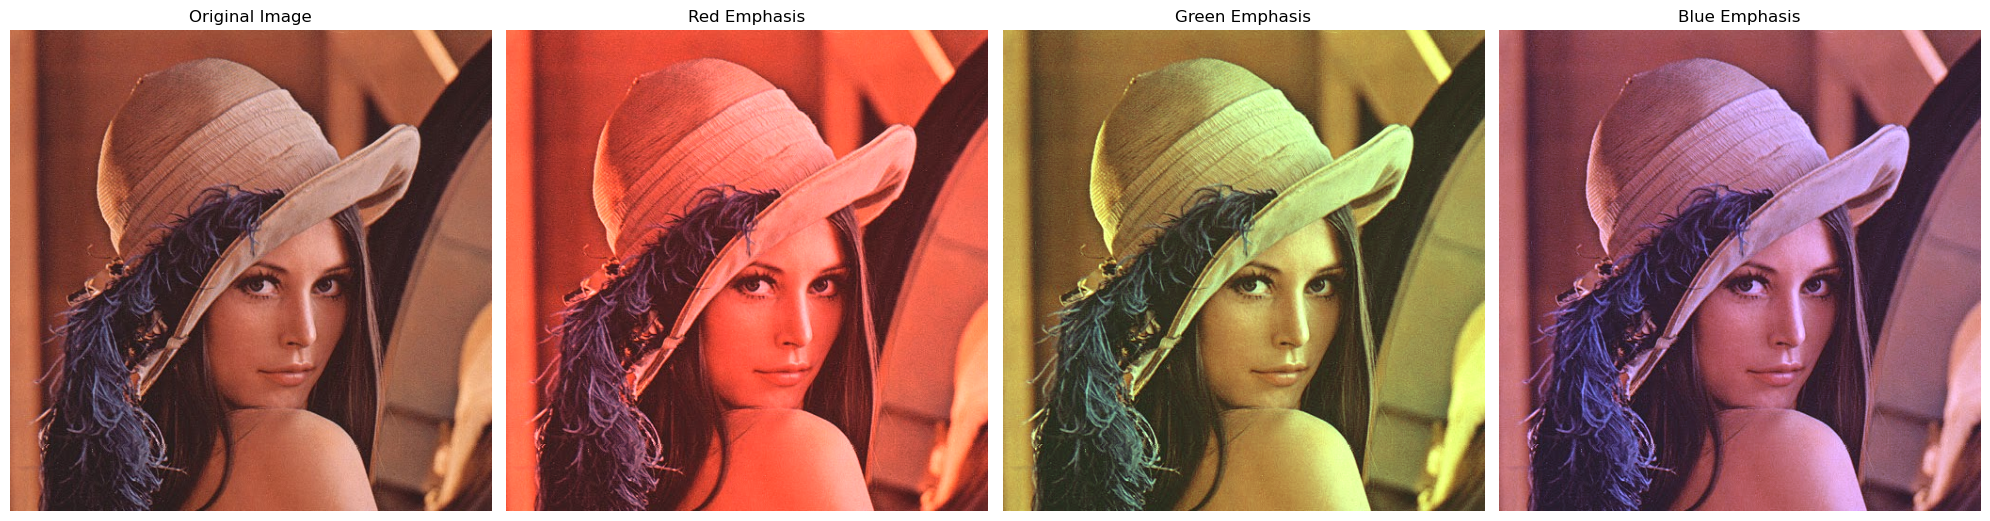